# WP5 Demo

This notebook contains a demo run of the SW components developed for WP5 up to 2022-06-01.

In [1]:
# ============================================================
# Notebook setup: run this before everything
# ============================================================

%load_ext autoreload
%autoreload 2

from labeler.unibo.utility.log_utils import Logger
from explanation.plot_utils import plot_relative_scores, query_scores_boxplot, query_scores_bar
import os
from util import local
from util import ui

/usr/local/lib/python3.8/dist-packages/huggingface_hub/snapshot_download.py:6: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  warnings.warn(


## Load the Labels

In [2]:
label_fname = os.path.join('data', 'labels', 'labels.json')
labels = local.load_labels(label_fname)
display(labels)

[label(12, Planning),
 label(13, Scheduling),
 label(21, Knowledge Representation),
 label(22, Automated Reasoning),
 label(23, Commonsense Reasoning),
 label(24, Searching),
 label(25, Optimization),
 label(26, Machine Learning),
 label(27, Natural Language Processing),
 label(28, Computer Vision),
 label(29, Audio Processing),
 label(30, Multi-Agent Systems),
 label(31, Robotics and Automation),
 label(32, Connected and Autonomous Vehicles),
 label(33, Data Mining),
 label(34, AI Ethics)]

## Load Resources (Assets)

In [3]:
resource_fname = os.path.join('data', 'resources', 'ai-catalog-v2.csv')
resources = local.load_resources(resource_fname)
display(resources)

Name  \
0        TAMER Unified Planning Interface | AI4EU   
1    Pyperplan Unified Planning Interface | AI4EU   
2              Unified Planning Framework | AI4EU   
3                      AI4IoT Data Source | AI4EU   
4               AI4IoT Sensor Calibration | AI4EU   
..                                            ...   
119                         PDDL Planners | AI4EU   
120                                 ABELE | AI4EU   
121                                  LORE | AI4EU   
122                               LioNets | AI4EU   
123                           LionForests | AI4EU   

                                           Description  
0    This asset provides the interfacing between th...  
1    This asset provides the interfacing between th...  
2    The Unified Planning Framework (UPF) library m...  
3    This asset was development for the AI4IoT Pilo...  
4    This asset was development for the AI4IoT Pilo...  
..                                                 ...  
119  Dockerized/ACUMOS Ready PDDL planners (ff, fd,...  
120  Adversarial Black box Explainer generating Lat...  
121  LORE (LOcal Rule-based Explanations) is a mode...  
122  LioNets: Local Interpretations Of Neural Netwo...  
123             Local Interpretation of Random Forests  

[124 rows x 2 columns]

## Loading Queries (Use Cases)

In [4]:
query_fname = os.path.join('data', 'queries', 'use-cases-20220429.csv')
queries = local.load_queries(query_fname)
display(queries)

['Magazino is an innovative company producing robots for warehouse intra logistics. In Magazino, each robot is given a prioritized list of jobs to perform, and each of them is associated with a hand-written plan, encoded using a behavior tree formalism. This solution has a few drawbacks: handwriting of the behavior trees requires expert knowledge and quite some brain power to be carried out without mistakes. This makes the writing tedious and the maintenance and update complex and error prone. For example, in addition to take into account the possible failures and unexpected events, such plans need to be crafted considering that the executor might get restarted at any point in time, losing and thus needing to reconstruct the world and internal states. Finally, the behavior trees are typically rather complex and they are not suitable to be analyzed or manipulated by some high-level reasoning mechanism. In this context, AI techniques can be used to guide the user to design the complex pl

## Labeling (UniBO version)

Configure the labeler:

In [5]:
log_dir = 'log'
log_path = os.path.join(log_dir, Logger.logging_dir)
labeler = local.build_unibo_labeler(label_fname, log_path)

/usr/local/lib/python3.8/dist-packages/huggingface_hub/file_download.py:560: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[Logger] Retrieving new logger: log/log
2022-06-23 10:31:58,420 - labeler.unibo.assets_labeler - INFO - [SBertLabeler] Configuring...
2022-06-23 10:31:58,421 - labeler.unibo.assets_labeler - INFO - [SBertLabeler] Loading labels from JSON file...
2022-06-23 10:32:02,384 - labeler.unibo.assets_labeler - INFO - [SBertLabeler] Loading label relations from CSV file...
2022-06-23 10:32:02,390 - labeler.unibo.assets_labeler - INFO - [SBertLabeler] Attempting to store new information:
Labels: [label(12, Planning), label(13, Scheduling), label(21, Knowledge Representation), label(22, Automated Reasoning), label(23, Commonsense Reasoning), label(24, Searching), label(25, Optimization), label(26, Machine Learning), label(27, Natural Language Processing), label(28, Computer Vision), label(29, Audio Processing), label(30, Multi-Agent Systems), label(31, Robotics and Automation), label(32, Connected and Autonomous Vehicles), label(33, Data Mining), label(34, AI Ethics)]
Relations: {}
2022-06-23 10:3

Label the resources:

In [6]:
# Label the resources
resource_descriptions = [d for d in resources['Description']]
resource_scores = labeler.score(resource_descriptions)

# Associate resource data and scores
resources_index = local.build_resource_index(resources, resource_scores)

# Convert the results to a DF for displaying
resource_scores_df = local.get_score_df(resource_scores, labels)
display(resource_scores_df)

2022-06-23 10:32:03,979 - labeler.unibo.assets_labeler - INFO - [SBertLabeler] Starting ontology matching:
Total documents: 124
Total ontology labels: 16
Strategy: descr2text
S-BERT model: SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)


100%|██████████| 124/124 [00:04<00:00, 29.04it/s]


Planning  Scheduling  Knowledge Representation  Automated Reasoning  \
0    0.499951    0.355029                  0.319087             0.313171   
1    0.417164    0.275643                  0.288869             0.243665   
2    0.584329    0.327568                  0.298236             0.321399   
3    0.179633    0.232336                  0.282858             0.215218   
4    0.206589    0.207078                  0.186569             0.226544   
..        ...         ...                       ...                  ...   
119  0.277439    0.256640                  0.239573             0.199436   
120  0.197147    0.168781                  0.330926             0.364547   
121  0.219963    0.248749                  0.447323             0.545326   
122  0.102520    0.146735                  0.254723             0.284849   
123  0.123801    0.152548                  0.137372             0.137916   

     Commonsense Reasoning  Searching  Optimization  Machine Learning  \
0                 0.203496   0.314797      0.315344          0.358277   
1                 0.170526   0.248326      0.256813          0.322660   
2                 0.248660   0.379864      0.306376          0.282406   
3                 0.157268   0.215892      0.167428          0.210263   
4                 0.210317   0.231275      0.250153          0.292899   
..                     ...        ...           ...               ...   
119               0.049801   0.187657      0.215599          0.126150   
120               0.246679   0.244510      0.239541          0.342832   
121               0.358834   0.337842      0.397069          0.383771   
122               0.239824   0.197292      0.274912          0.458097   
123               0.163705   0.177031      0.319218          0.258267   

     Natural Language Processing  Computer Vision  Audio Processing  \
0                       0.295905         0.291413          0.305051   
1                       0.256761         0.249761          0.308120   
2                       0.284075         0.259482          0.239787   
3                       0.226572         0.318929          0.271949   
4                       0.218192         0.321609          0.272116   
..                           ...              ...               ...   
119                     0.128497         0.097609          0.136782   
120                     0.233951         0.224344          0.287484   
121                     0.317551         0.329571          0.254865   
122                     0.278648         0.242696          0.258256   
123                     0.153211         0.223807          0.136029   

     Multi-Agent Systems  Robotics and Automation  \
0               0.388132                 0.410351   
1               0.333781                 0.347210   
2               0.438129                 0.488678   
3               0.301098                 0.194098   
4               0.273708                 0.265852   
..                   ...                      ...   
119             0.219034                 0.288930   
120             0.233703                 0.144846   
121             0.322505                 0.161890   
122             0.232358                 0.152639   
123             0.199675                 0.132317   

     Connected and Autonomous Vehicles  
0                             0.347990  
1                             0.283003  
2                             0.331587  
3                             0.296368  
4                             0.307686  
..                                 ...  
119                           0.237718  
120                           0.138732  
121                           0.169701  
122                           0.160430  
123                           0.128253  

[124 rows x 14 columns]

Label the queries

In [7]:
# Label the queries
query_scores = labeler.score(queries)

# Convert the results to a DF for displaying
query_scores_df = local.get_score_df(query_scores, labels)
display(query_scores_df)

2022-06-23 10:32:12,917 - labeler.unibo.assets_labeler - INFO - [SBertLabeler] Starting ontology matching:
Total documents: 81
Total ontology labels: 16
Strategy: descr2text
S-BERT model: SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)


100%|██████████| 81/81 [00:17<00:00,  4.54it/s]


Planning  Scheduling  Knowledge Representation  Automated Reasoning  \
0   0.625869    0.492207                  0.442890             0.483605   
1   0.568330    0.562036                  0.381799             0.382709   
2   0.597920    0.617393                  0.370821             0.378552   
3   0.685315    0.508930                  0.355289             0.450030   
4   0.586471    0.536011                  0.397609             0.470153   
..       ...         ...                       ...                  ...   
76  0.492397    0.390652                  0.326603             0.413145   
77  0.489305    0.378235                  0.482197             0.539945   
78  0.422573    0.310474                  0.294066             0.318827   
79  0.408920    0.457281                  0.289545             0.303172   
80  0.388745    0.428369                  0.313215             0.393389   

    Commonsense Reasoning  Searching  Optimization  Machine Learning  \
0                0.385395   0.545934      0.444291          0.432431   
1                0.377972   0.487664      0.380318          0.357922   
2                0.332327   0.495270      0.324160          0.343218   
3                0.342573   0.595353      0.619801          0.486389   
4                0.383473   0.503545      0.606570          0.450052   
..                    ...        ...           ...               ...   
76               0.408506   0.369718      0.286413          0.414085   
77               0.441826   0.446521      0.425617          0.446750   
78               0.135760   0.372933      0.444028          0.416797   
79               0.282880   0.419992      0.512053          0.422341   
80               0.331790   0.466106      0.317621          0.363060   

    Natural Language Processing  Computer Vision  Audio Processing  \
0                      0.306411         0.394655          0.350739   
1                      0.361463         0.367998          0.333570   
2                      0.216108         0.389091          0.302206   
3                      0.301647         0.398475          0.403800   
4                      0.331812         0.443644          0.448476   
..                          ...              ...               ...   
76                     0.293241         0.422769          0.357259   
77                     0.439720         0.412933          0.447557   
78                     0.261977         0.278729          0.280802   
79                     0.316738         0.383555          0.260300   
80                     0.343377         0.491294          0.328218   

    Multi-Agent Systems  Robotics and Automation  \
0              0.601252                 0.642045   
1              0.388555                 0.377172   
2              0.499728                 0.599451   
3              0.551320                 0.506294   
4              0.534778                 0.414731   
..                  ...                      ...   
76             0.408168                 0.368111   
77             0.429038                 0.284270   
78             0.261812                 0.241532   
79             0.508464                 0.478040   
80             0.434665                 0.439211   

    Connected and Autonomous Vehicles  
0                            0.533636  
1                            0.433811  
2                            0.401675  
3                            0.580671  
4                            0.438797  
..                                ...  
76                           0.439688  
77                           0.398459  
78                           0.198503  
79                           0.334986  
80                           0.397719  

[81 rows x 14 columns]

## Online Matchmaking

Build a matchmaking component

In [8]:
# Build Matchmaking object
online_alg = local.build_online_matchmaking(resources_index)

Run matchmaking for an example query:

In [9]:
query_id_mm = 2
mm_res = online_alg.matchOne(query_scores=query_scores[query_id_mm])

ui.display_online_matchmaking_results(queries[query_id_mm], resources_index, mm_res, max_resources=5)

## Query Analysis

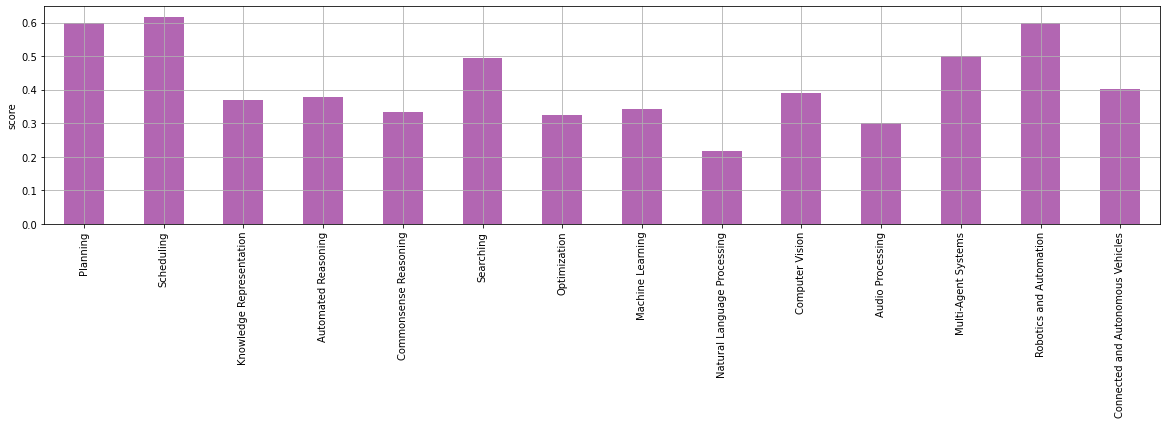

In [10]:
query_id = query_id_mm
#query_id = 5
#query_id = 2
#query_id = 46
query_scores_bar(queries[query_id], query_scores[query_id], labels)

## Matching Analysis

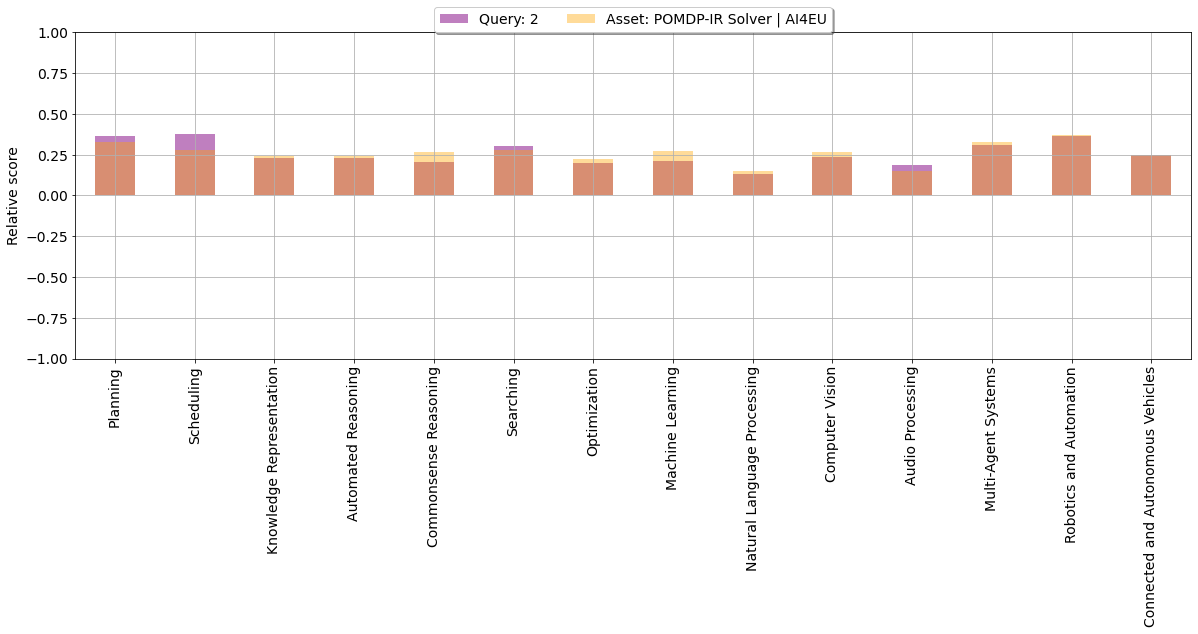

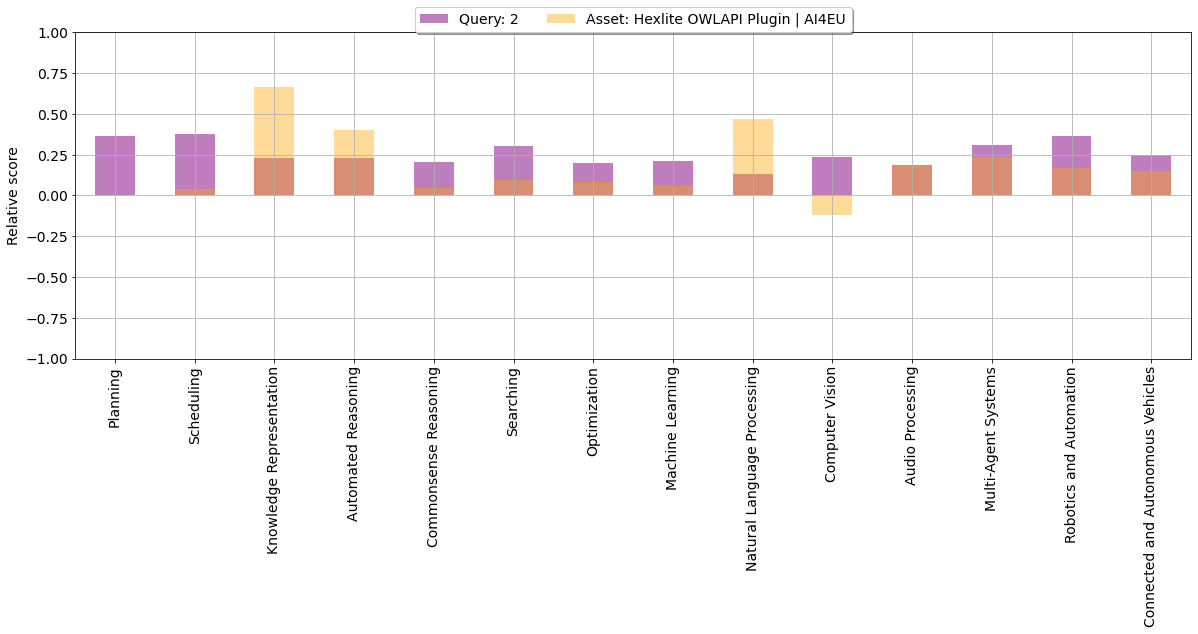

In [11]:
# Obtain relative scores
query_relative_scores, assets_relative_scores = local.get_relative_scores(query_scores[query_id_mm], online_alg)

# Plot relative scores  
best_match= mm_res[0]
worst_match =  mm_res[-1]
for match in [best_match,worst_match]: 
    asset_id = match[0]
    score = match[1]
    title = f'{resources.iloc[asset_id].Name} (score: {score})'
    plot_relative_scores(query_relative_scores, 
                         assets_relative_scores.loc[asset_id], 
                         query_name = query_id_mm,  
                         asset_name=resources.iloc[asset_id].Name, 
                         label_names=[l.name for l in labels])  